In [11]:
import pandas as pd
import numpy as np

In [12]:
logs = [
    {
        'lr': -4,
        'file': 'logs-0.0625.tsv'
    },
    {
        'lr': -6,
        'file': 'logs-0.015.tsv'
    },
    {
        'lr': -8,
        'file': 'logs-0.004.tsv'
    },
    {
        'lr': -10,
        'file': 'logs-0.001.tsv'
    },
    {
        'lr': -12,
        'file': 'logs-0.00024.tsv'
    },
    {
        'lr': -14,
        'file': 'logs-0.00006.tsv'
    },
    {
        'lr': -7.5,
        'file': 'logs-0.0055.tsv'
    },
    {
        'lr': -7,
        'file': 'logs-0.0078.tsv'
    },
    {
        'lr': -6.5,
        'file': 'logs-0.011.tsv'
    },
    {
        'lr': -5.5,
        'file': 'logs-0.022.tsv'
    },
    {
        'lr': -5,
        'file': 'logs-0.031.tsv'
    },
    {
        'lr': -4.5,
        'file': 'logs-0.044.tsv'
    }
]

In [13]:
logs.sort(key=lambda a: a['lr'])

In [14]:
logs

[{'lr': -14, 'file': 'logs-0.00006.tsv'},
 {'lr': -12, 'file': 'logs-0.00024.tsv'},
 {'lr': -10, 'file': 'logs-0.001.tsv'},
 {'lr': -8, 'file': 'logs-0.004.tsv'},
 {'lr': -7.5, 'file': 'logs-0.0055.tsv'},
 {'lr': -7, 'file': 'logs-0.0078.tsv'},
 {'lr': -6.5, 'file': 'logs-0.011.tsv'},
 {'lr': -6, 'file': 'logs-0.015.tsv'},
 {'lr': -5.5, 'file': 'logs-0.022.tsv'},
 {'lr': -5, 'file': 'logs-0.031.tsv'},
 {'lr': -4.5, 'file': 'logs-0.044.tsv'},
 {'lr': -4, 'file': 'logs-0.0625.tsv'}]

In [15]:
width_train_loss = []
for log in logs:
    lr = log['lr']
    raw_data = pd.read_csv('logs-xent/'+log['file'], sep='\t')
    data = raw_data[raw_data['epoch'] == 20]['test_acc']
    width_train_loss.append({
        'lr': lr,
        'data': data.values
    })

In [16]:
data = []
widths = [64, 128, 256, 512, 1024, 2048]
for i in range(len(widths)):
    width = widths[i]
    xys = []
    for j in range(len(width_train_loss)):
        xys.append([width_train_loss[j]['lr'], width_train_loss[j]['data'][i]])
    data.append(np.array(xys))

In [17]:
data[0][:, 0]

array([-14. , -12. , -10. ,  -8. ,  -7.5,  -7. ,  -6.5,  -6. ,  -5.5,
        -5. ,  -4.5,  -4. ])

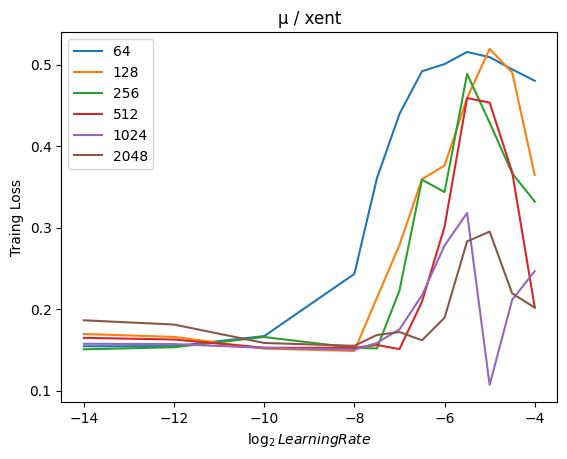

In [18]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt 



for i in range(len(data)):
    xs = data[i][:, 0]
    ys = data[i][:, 1]
    # cubic_interploation_model=interp1d(xs, ys, kind="cubic")
    # xs=np.linspace(-14, -4, 20)
    # ys=cubic_interploation_model(xs)
    plt.plot(xs, ys, label=str(widths[i]))
    plt.xlabel(r'$\log_2{LearningRate}$')
    plt.ylabel(r'Traing Loss')
    plt.title('μ / xent')
    plt.legend()

In [19]:
2**np.linspace(-10, -4, 10)

array([0.00097656, 0.0015502 , 0.00246078, 0.00390625, 0.00620079,
       0.00984313, 0.015625  , 0.02480314, 0.03937253, 0.0625    ])

In [21]:
np.linspace(-10, -4, 10)

array([-10.        ,  -9.33333333,  -8.66666667,  -8.        ,
        -7.33333333,  -6.66666667,  -6.        ,  -5.33333333,
        -4.66666667,  -4.        ])